# QUESTION 1, a) DESCRIPTIVE ANALYSIS
A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.

### Introduction
<p> This question is solved using Jupyter Notebooks, then uploaded to XXX. The solution steps as follow: </p>

1. Import modules
2. Load data into pandas DataFrame
3. Use describe() method to generate a descriptive information of the dataset
4. Run Shapiro-Wilk test to check whether to run a parametric or non parametric test
5. From the test above, non-parametric test should be carried out. Spearman's Rank Correlation is used to do the correlation
6. Kruskal Wallis H Test is carried out as alternative to ANOVA

### Step 1: Modules Used For This Project

In [ ]:
!pip install prettytable
import pandas as pd
import scipy.stats as stats
from prettytable import PrettyTable
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

### STEP 2: Read CSV As DataFrame And Generate Descripive Information Of The Dataset

In [ ]:
data = pd.read_csv(r"https://docs.google.com/spreadsheets/d/e/2PACX-1vQOdsaFChbSVH7QXsEOLLJNZiL3lr5uFg8ZvBA3tTHKNreaPwZvTA3WQN4LN5f_vYgX_TxkpZKOt0l9/pub?output=csv")
data.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


### STEP 3: Shapiro–Wilk Test
<p>This test is to determine whether this dataset has a Gaussian distribution.</p>

__Hypothesis__

* H0: the sample has a Gaussian distribution.
* H1: the sample does not have a Gaussian distribution.


In [ ]:
t = PrettyTable(['column', 'p-value', 'is p-value>0.05?'])

for col in data:
    s, p = stats.shapiro(data[col])
    t.add_row([col, p, p>0.05])

print(t)

+--------+------------------------+------------------+
| column |        p-value         | is p-value>0.05? |
+--------+------------------------+------------------+
|   a    | 1.0766432233591527e-12 |      False       |
|   b    | 3.4656832781365665e-07 |      False       |
|   c    | 2.3908993861355223e-19 |      False       |
|   d    | 2.083195624891232e-07  |      False       |
|   e    | 2.174813440447565e-09  |      False       |
|   f    | 2.1721748481042377e-25 |      False       |
|   g    | 4.2866537515527225e-16 |      False       |
|   h    | 5.383263238128378e-26  |      False       |
|   i    | 1.156668784076633e-20  |      False       |
+--------+------------------------+------------------+


<p>From the result of the Shapiro–Wilk test, p-value of every data group of the data set is less than 0.05, we have 95% confident that every data group of the set has no Gaussian distribution. Hence, the null hypothesis is rejected and non parametric test should be carried out to perform the analysis.</p>

## STEP 4: Non-parametric Test: Spearman's Rank Correlation Coefficient Matrix

<p>The assumption of normality for Pearson Correlation Test aren't met. Therefore, non parametric alternative, Spearman's Rank Correlation will be carried out. This test is done by comparing every column in the dataset with each other, and determine whether they are independent to each other or not.</p>

- H0: the two samples are independent.
- H1: there is a dependency between the samples.

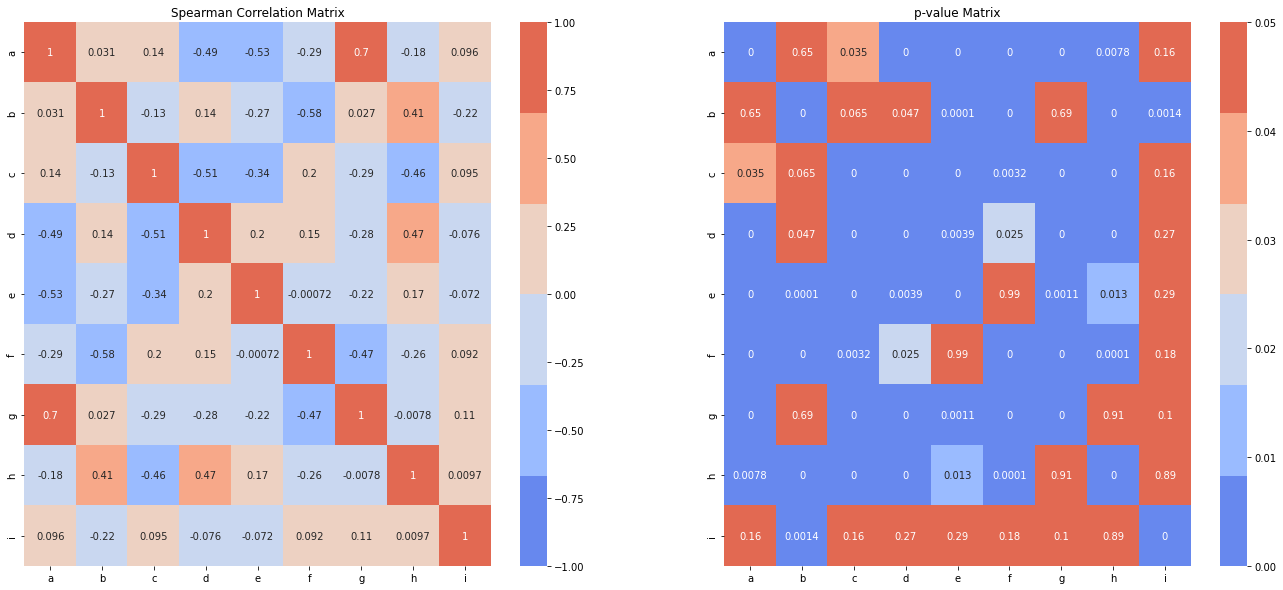

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(23, 10))
corrMatrix = data.corr(method='spearman')

p_data = []
for d1 in data.columns:
  p_row = []
  for d2 in data.columns:
    stat, p = stats.spearmanr(data[d1], data[d2])
    p_row.append(round(p,4))
  p_data.append(p_row)

sns.heatmap(corrMatrix, annot=True, cmap=sns.color_palette("coolwarm"), vmin=-1, vmax=1, ax=ax[0])
sns.heatmap(p_data, annot=True, cmap=sns.color_palette("coolwarm"), vmin=0, vmax=0.05, xticklabels=data.columns, yticklabels=data.columns, ax=ax[1])
ax[0].set_title('Spearman Correlation Matrix')
ax[1].set_title('p-value Matrix')
fig.show()

<p>From the p-value Matrix (diagram on the right), cells in red colour indicate that the addictive pairs have p-value > 0.05 and failed to rejected the null hypothesis. These pairs are significantly independent. While the rest of pairs are significantly dependent on each other. Most of the pairs in this dataset are significantly dependent on each other.</p>

## STEP 5: Non-parametric Test: Kruskal Wallis H Test

<p>The assumption of normality for ANOVA aren't met. Therefore, non parametric alternative of ANOVA, Kruskal Wallis H Test will be carried out.</p>

- H0: There is no significant difference between the 9 addictives.
- H1: There is significant difference between the 9 addictives.

<p>In order to perform this test, the degrees of freedom for the chi-square (df) need to be determined. The degrees of freedom for the chi-square , df = (r-1)*(c-1), where, </p>

- r = number of row of the dataset
- c = number of column of the dataset 

First, determine the degree of freedom of the data set, df.

In [ ]:
# Determine number of row and column of the data set
r,c = data.shape
# Degree of freedom, df = (r-1)(c-1)
df = (r-1)*(c-1)
print(f"df= {df}")

df= 1704


<p> Then, the critical chi-square value at a significant level of 0.05, <i>chi2cric</i> is determined with the method below: </p>

In [ ]:
chi2cric = stats.chi2.ppf(1-.05, df)
print("chi2cric= %.3f" %(chi2cric))

chi2cric= 1801.147


<p>According the calculation aboves:</p>
<p><i>df</i> = 1,704, and <br><i>chi2cric</i> = 1,801.147</p>
<p>Finally, Kruskal Wallis Test was carried out, and the Kruskal-Wallis chi-squared, <i>H</i> = 1707.638</p>

In [ ]:
H, p = stats.kruskal(data['a'],data['b'],data['c'],data['d'],data['e'],data['f'],data['g'],data['h'],data['i'])
print("H= %.3f" %(H))

H= 1707.638


## CONCLUSION

Kruskal-Wallis chi-squared value, H is smaller than critical chi-squared value, the null hypothesis failed to be rejected. There is __no statistic significant difference__ between the 9 addictives.



---
# QUESTION 1, b) GRAPHICAL ANALYSIS
A graphical analysis of the additives, including a distribution study.

### Distribution of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2104527950>,
      dtype=object)

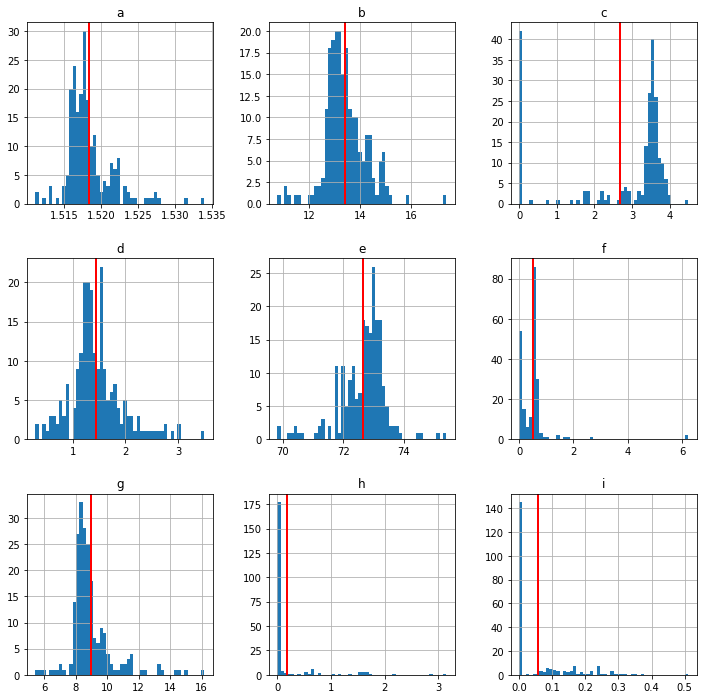

In [ ]:
fig, axis = plt.subplots(3,3,figsize=(12, 12))
for i,avg in enumerate(data.mean()):
  axis[int(i/3)][i%3].axvline(avg, color='r', linestyle='solid', linewidth=2)
data.hist(ax=axis, bins = 50)

From the histogram of the 9 columns, 

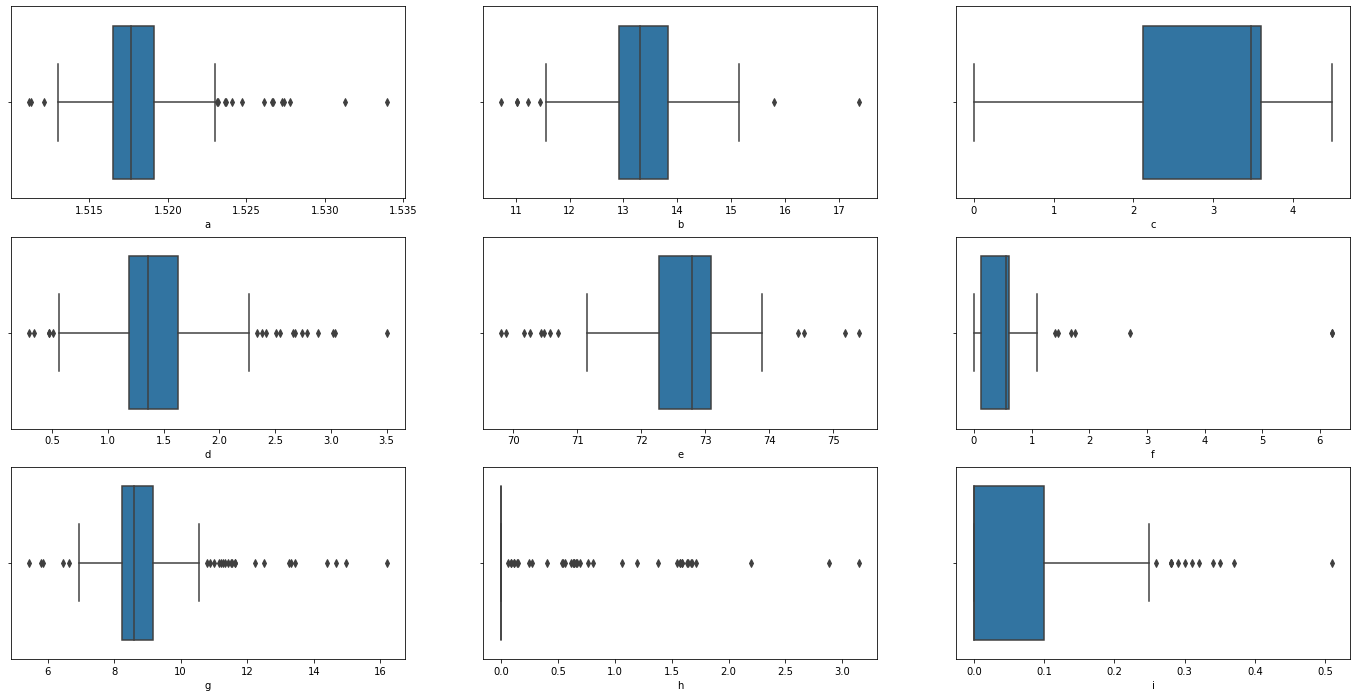

In [ ]:
fig, axis = plt.subplots(3,3,figsize=(24, 12))
for i,col in enumerate(data):
	sns.boxplot(x=data[col], ax=axis[int(i/3)][i%3],labels=col)

### Scatter Plot : Correlation

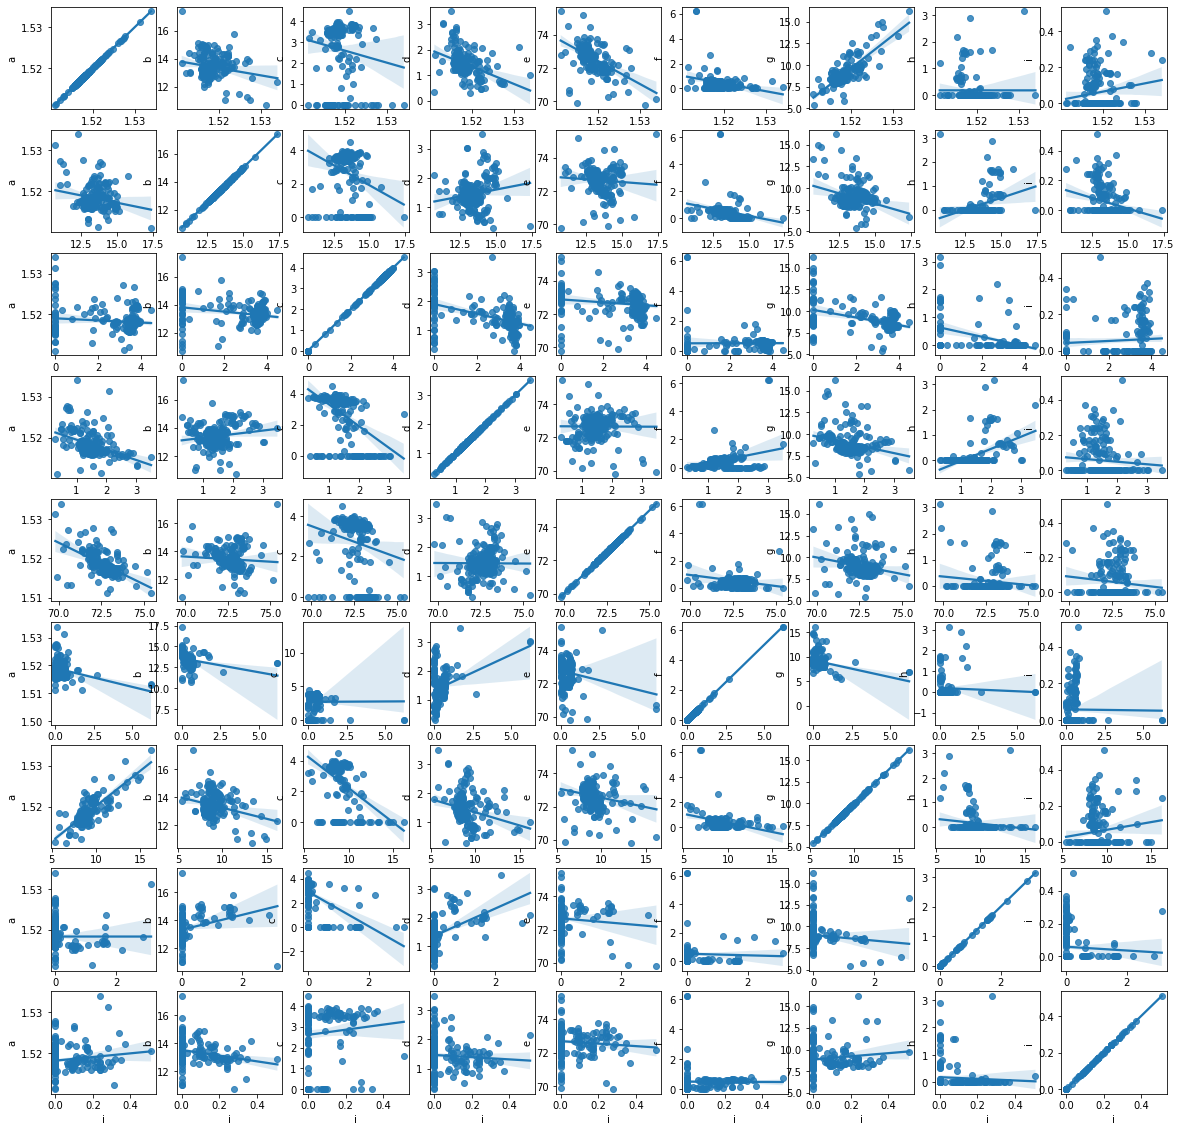

In [ ]:
fig, axis = plt.subplots(len(data.columns),len(data.columns),figsize=(20, 20))
for i,d1 in enumerate(data.columns):
  for j,d2 in enumerate(data.columns):
    sns.regplot(x=data[d1], y=data[d2], ax=axis[i][j])

---

## Task 1c: 
A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

### Introduction
K-means clustering unsupervised machine learning algorithm has been used to determine the distinctive number of formulation present in the dataset. Steps for finding the solution as follow:

1. Perform K-means clustering n_clusters=1 to n_clusters=20 to determine the distortion of the inertia, and plot them into a elbow curve. Approximate the n_cluster range where the elbow located.
2. With the range determined from above, perform K-means clustering again with n_cluster equal to the range. Silhoutte analysis has been performed on the cluster with n_cluster of the range. 
3. The distinctive number of formulations is equal to the n_cluster with the peak Silhoutte score.

### STEP 1: The Elbow Curve

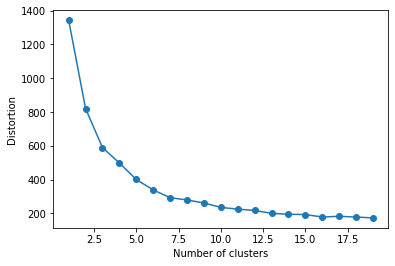

In [ ]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 20):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### STEP 2: Silhouette Analysis

<p>From the elbow curve above, the elbow is located between k=3 to k=7. Hence, we perform Silhouette analysis with n_cluster=2 to n_cluster=8</p>

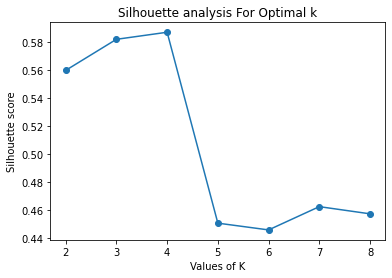

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []

for num_clusters in range_n_clusters:
  # initialise kmeans
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(data)
  cluster_labels = kmeans.labels_
  # silhouette score
  silhouette_avg.append(silhouette_score(data, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg, marker='o')
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

### CONCLUSION: 
<p> From the graph above, Silhouette score is maximized at k =3. The distinctive number of formulations is equal to the n_cluster with the peak Silhoutte score which is 3.</p>

(array([ 21., 162.,  31.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <a list of 3 Patch objects>)

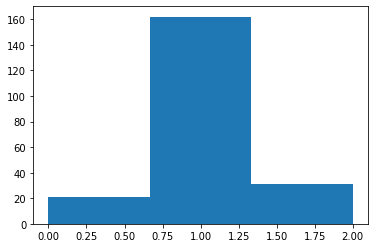

In [ ]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(data)
plt.hist(y_km, bins=3)

<p> The histogram above show the distribution of formulation predicted by K Mean Clustering unsupervised machine learning model with n_cluster=3. </p>